<a href="https://colab.research.google.com/github/GyuHyeong-Kim/Anomaly_Detection/blob/main/2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA를 사용한 이상치 검출

> PyTorch 구현

> MNIST 데이터셋 사용

> 비정상적인 형태를 가진 숫자 이미지를 식별 후 출력

> 상위 5% 숫자 이미지를 이상치로 설정

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# MNIST 데이터셋
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:11<00:00, 898kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.9kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



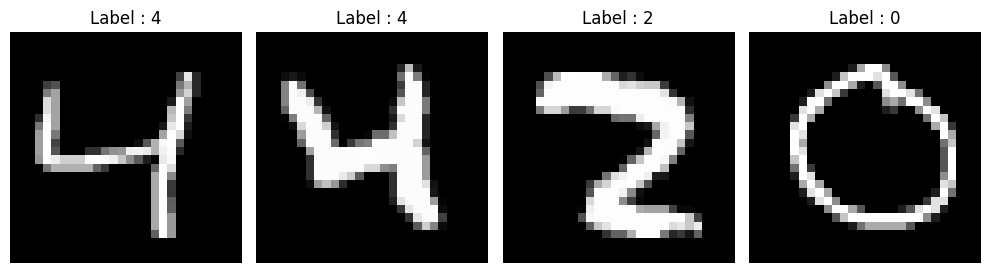

In [ ]:
# 데이터 변환
data = train_dataset.data.view(-1, 28*28).numpy()
labels = train_dataset.targets.numpy()

# PCA 적용
pca = PCA(n_components = 50)
data_pca = pca.fit_transform(data)

# 재구성
data_reconstructed = pca.inverse_transform(data_pca)

# 재구성 오차 계산
reconstruction_error = np.mean((data - data_reconstructed)**2, axis = 1)

# 임계값 설정 및 이상치 검출
threshold = np.percentile(reconstruction_error, 95)
outliers = np.where(reconstruction_error > threshold)[0]

# 비정상적인 형태를 가진 숫자 이미지 출력
num_outliers_to_show = 4
outlier_images = data[outliers][:num_outliers_to_show]
outlier_labels = labels[outliers][:num_outliers_to_show]

# 결과 시각화
plt.figure(figsize = (10, 5))

for i in range(num_outliers_to_show):
    plt.subplot(1, num_outliers_to_show, i + 1)
    plt.imshow(outlier_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f'Label : {outlier_labels[i].item()}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 차원 수 변화에 따른 이상치 검출 성능 비교

> 평균과 표준편차를 이용해 임계값을 설정

> (평균 + 2 x 표준편차)를 임계값으로 설정

> 차원 수에 따른 이상치 개수 시각화

> 이상치 검출 성능 비교를 그래프로 시각화

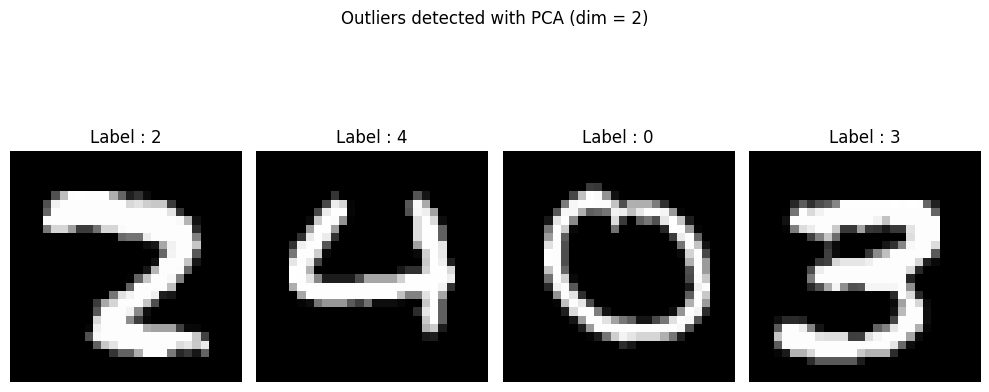

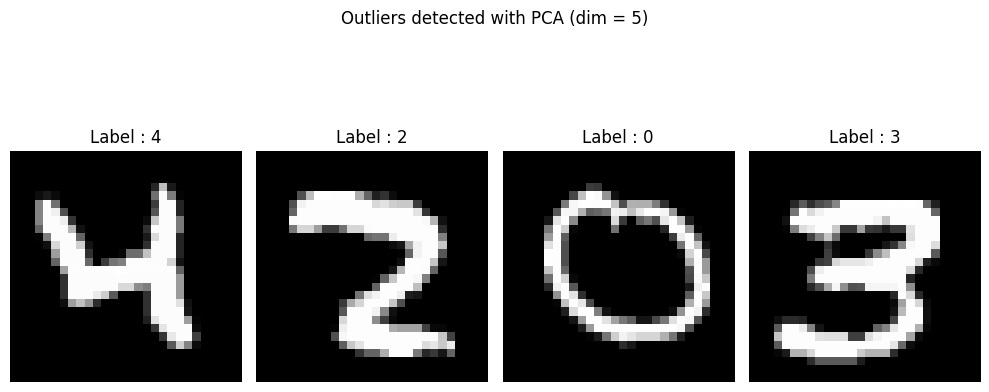

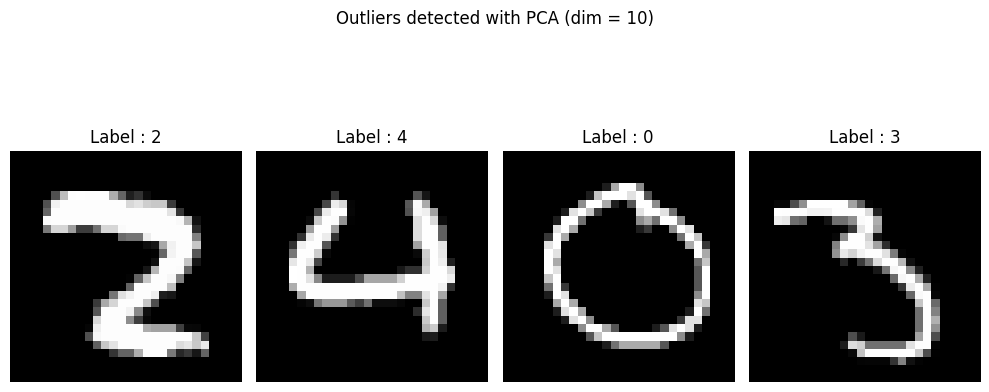

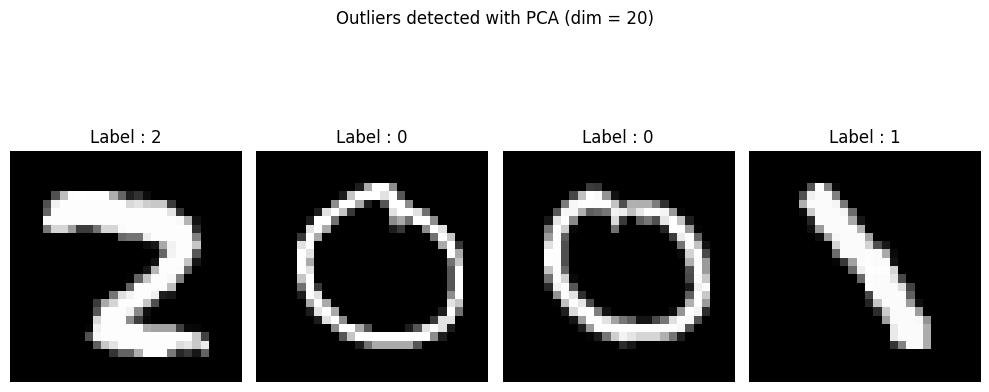

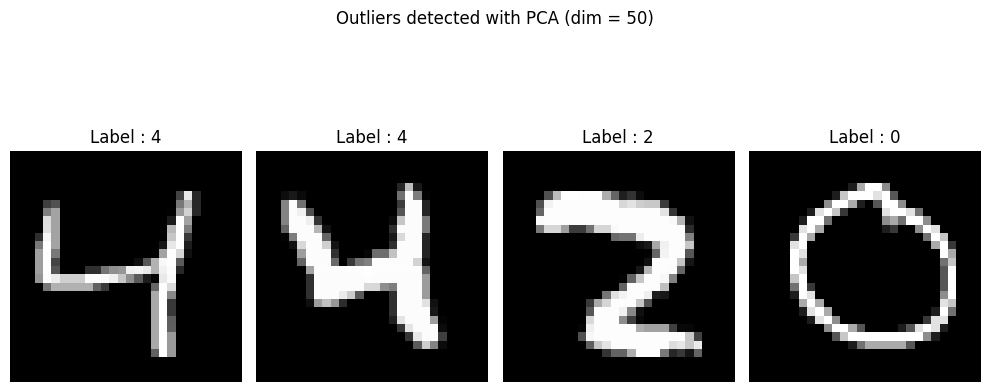

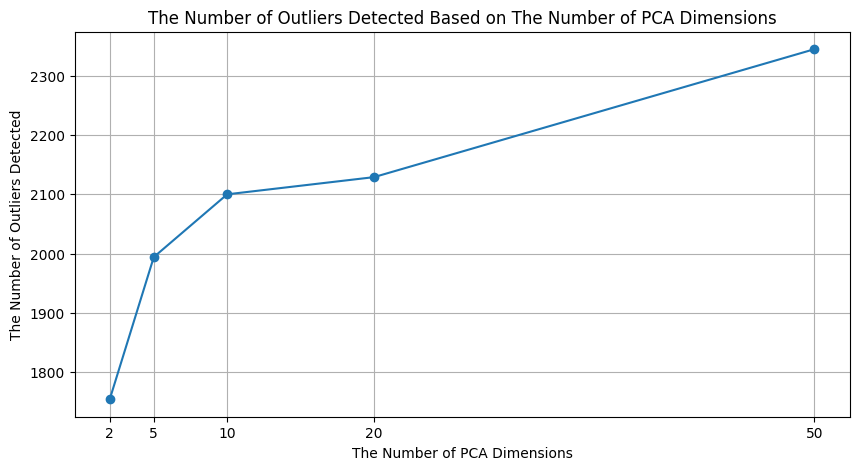

In [ ]:
# MNIST 데이터셋
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

# 데이터 변환
data = train_dataset.data.view(-1, 28*28).numpy()
labels = train_dataset.targets.numpy()

# 차원 수에 따른 PCA 적용 및 이상치 검출 성능 비교
dimensions = [2, 5, 10, 20, 50]
thresholds = []
outlier_counts = []

for dim in dimensions:
    # PCA 적용
    pca = PCA(n_components = dim)
    data_pca = pca.fit_transform(data)

    # 재구성
    data_reconstructed = pca.inverse_transform(data_pca)

    # 재구성 오차 계산
    reconstruction_error = np.mean((data - data_reconstructed)**2, axis = 1)

    # 평균과 표준편차를 이용한 임계값 설정
    mean_error = np.mean(reconstruction_error)
    std_error = np.std(reconstruction_error)
    threshold = mean_error + 2 * std_error # 평균 + 2 x 표준편차를 임계값으로 설정
    outliers = np.where(reconstruction_error > threshold)[0]

    thresholds.append(threshold)
    outlier_counts.append(len(outliers))

    # 비정상적인 형태를 가진 숫자 데이터 출력
    outliers_to_show = min(4, len(outliers))
    outlier_images = data[outliers][:outliers_to_show]
    outlier_labels = labels[outliers][:outliers_to_show]

    # 결과 시각화
    plt.figure(figsize = (10, 5))
    for i in range(outliers_to_show):
        plt.subplot(1, outliers_to_show, i + 1)
        plt.imshow(outlier_images[i].reshape(28, 28), cmap = 'gray')
        plt.title(f'Label : {outlier_labels[i]}')
        plt.axis('off')
    plt.suptitle(f'Outliers detected with PCA (dim = {dim})')
    plt.tight_layout()
    plt.show()

# 차원 수에 따른 이상치 개수 시각화
plt.figure(figsize = (10, 5))
plt.plot(dimensions, outlier_counts, marker = 'o')
plt.title('The Number of Outliers Detected Based on The Number of PCA Dimensions')
plt.xlabel('The Number of PCA Dimensions')
plt.ylabel('The Number of Outliers Detected')
plt.xticks(dimensions)
plt.grid()
plt.show()